In [1]:
import json, random, pathlib, pandas as pd

DATA = pathlib.Path('HARP.jsonl')
records = [json.loads(l) for l in DATA.open()]

In [2]:
hard = [r for r in records if r["level"] >= 5]
print(len(hard))

394


In [3]:
l6 = pd.read_csv('../data/harp_level6.csv')
l6['answer'].tolist()

['$448$',
 '$130$',
 '$175$',
 '$15$',
 '$38$',
 '$36$',
 '$401$',
 '$25$',
 '$864$',
 '$560$',
 '$750$',
 '$400$',
 '$931$',
 '$373$',
 '$462$',
 '$987$',
 '$84$',
 '$704$',
 '$905$',
 '$490$',
 '$108$',
 '$184$',
 '$594$',
 '$20$',
 '$990$',
 '$384$',
 '$12$',
 '$820$',
 '$94$',
 '$396$',
 '$163$',
 '$448$',
 '$997$',
 '$850$',
 '$71$',
 '$597$',
 '$400$',
 '$378$',
 '$37$',
 '$65$',
 '$768$',
 '$777$',
 '$582$',
 '$554$',
 '$368$',
 '$130$',
 '$761$',
 '$742$',
 '$463$',
 '$408$',
 '$731$',
 '$571$',
 '$927$',
 '$200$',
 '$495$',
 '$174$',
 '$351$',
 '$85$',
 '$69$',
 '$840$',
 '$417$',
 '$63$',
 '$30$',
 '$163$',
 '$901$',
 '$98$',
 '$282$',
 '$155$',
 '$127$',
 '$289$',
 '$683$',
 '$51$',
 '$15$',
 '$482$',
 '$813$',
 '$511$',
 '$484$',
 '$108$',
 '$593$',
 '$83$',
 '$936$',
 '$38$',
 '$418$',
 '$463$',
 '$169$',
 '$899$',
 '$183$',
 '$27$',
 '$15$',
 '$63$',
 '$9$',
 '$80$',
 '$224$',
 '$989$',
 '$640$',
 '$676$',
 '$389$',
 '$40$',
 '$432$',
 '$871$',
 '$29$',
 '$7$',
 '$181$',


In [10]:
completed = json.load(open("/sailhome/jshen3/research_projects/reasoning-distillation/results/harp_deepseek_qwen_14b_pass_l6/harp_deepseek_qwen_14b_pass_l6_20250507_065058/metrics.json"))
completed_ids = set(completed['problems'].keys())
error_ids = set(['H6-064', 'H6-038', 'H6-129', 'H6-144', 'H6-146', 'H6-132', 'H6-141', 'H6-153', 'H6-140'])
total_ids = set(l6['id'].tolist())
retry_ids = set(list(total_ids - completed_ids) + list(error_ids))
print(len(completed_ids), len(error_ids))
print(completed_ids)
print(retry_ids)
print(len(retry_ids))

132 9
{'H6-141', 'H6-104', 'H6-152', 'H6-012', 'H6-006', 'H6-174', 'H6-150', 'H6-138', 'H6-125', 'H6-093', 'H6-100', 'H6-159', 'H6-120', 'H6-105', 'H6-116', 'H6-098', 'H6-162', 'H6-170', 'H6-133', 'H6-118', 'H6-171', 'H6-013', 'H6-097', 'H6-155', 'H6-197', 'H6-070', 'H6-109', 'H6-167', 'H6-191', 'H6-131', 'H6-190', 'H6-192', 'H6-078', 'H6-147', 'H6-163', 'H6-099', 'H6-154', 'H6-115', 'H6-117', 'H6-139', 'H6-031', 'H6-126', 'H6-103', 'H6-121', 'H6-061', 'H6-056', 'H6-132', 'H6-119', 'H6-094', 'H6-140', 'H6-142', 'H6-181', 'H6-059', 'H6-175', 'H6-023', 'H6-124', 'H6-113', 'H6-135', 'H6-168', 'H6-130', 'H6-137', 'H6-144', 'H6-044', 'H6-101', 'H6-052', 'H6-178', 'H6-134', 'H6-195', 'H6-187', 'H6-179', 'H6-177', 'H6-183', 'H6-087', 'H6-149', 'H6-173', 'H6-151', 'H6-038', 'H6-075', 'H6-053', 'H6-072', 'H6-161', 'H6-082', 'H6-111', 'H6-112', 'H6-106', 'H6-172', 'H6-015', 'H6-185', 'H6-046', 'H6-180', 'H6-188', 'H6-127', 'H6-169', 'H6-069', 'H6-107', 'H6-176', 'H6-110', 'H6-156', 'H6-079', 'H6

In [17]:
import json

def analyze_results(results_file_path):
    """
    Analyzes a results.json file to find problems with exactly five complete solutions.

    A solution is considered "complete" if its 'finish_reason' is not 'length'.

    Args:
        results_file_path (str): The path to the results.json file.

    Returns:
        tuple: A tuple containing:
            - set: A set of problem_ids for problems that meet the criteria.
            - int: The count of such problems.
    """
    target_problem_ids = set()
    count_target_problems = 0

    try:
        with open(results_file_path, 'r') as f:
            data = json.load(f)
    except FileNotFoundError:
        print(f"Error: The file '{results_file_path}' was not found.")
        return target_problem_ids, 0
    except json.JSONDecodeError:
        print(f"Error: Could not decode JSON from the file '{results_file_path}'.")
        return target_problem_ids, 0
    except Exception as e:
        print(f"An unexpected error occurred while reading the file: {e}")
        return target_problem_ids, 0

    if "results" not in data or not isinstance(data["results"], list):
        print("Error: JSON structure is not as expected. Missing 'results' list.")
        return target_problem_ids, 0

    for problem in data["results"]:
        if not isinstance(problem, dict):
            # Skip if problem is not a dictionary
            continue

        problem_id = problem.get("problem_id")
        solutions = problem.get("solutions")

        if problem_id is None or not isinstance(solutions, list):
            # Skip if problem_id or solutions are missing/invalid
            continue

        if len(solutions) == 5:
            count_target_problems += 1
            target_problem_ids.add(problem_id)
            # all_solutions_have_finish_reason = True
            # for solution in solutions:
            #     if not isinstance(solution, dict):
            #         all_solutions_have_finish_reason = False
            #         break # Malformed solution, skip this problem
                
                # finish_reason = solution.get("finish_reason")
                # if finish_reason is None: # If finish_reason key is missing
                #     all_solutions_have_finish_reason = False
                #     break # Assume it's not complete, or data is malformed
                
                # if finish_reason != "length":
                #     complete_solutions_count += 1
            
            # if all_solutions_have_finish_reason and complete_solutions_count == 5:
            #     target_problem_ids.add(problem_id)
        else:
            print(f"Skipping problem {problem_id} with {len(solutions)} solutions")
                
    return target_problem_ids, count_target_problems

file_path = "/sailhome/jshen3/research_projects/reasoning-distillation/results/harp_deepseek_qwen_14b_pass_l6/harp_deepseek_qwen_14b_pass_l6_20250506_004040/results.json"
file_path2 = "/sailhome/jshen3/research_projects/reasoning-distillation/results/harp_deepseek_qwen_14b_pass_l6/harp_deepseek_qwen_14b_pass_l6_20250506_175633/results.json"
file_path3 = "/sailhome/jshen3/research_projects/reasoning-distillation/results/harp_deepseek_qwen_14b_pass_l6/harp_deepseek_qwen_14b_pass_l6_20250507_003243/results.json"
file_path4 = "/sailhome/jshen3/research_projects/reasoning-distillation/results/harp_deepseek_qwen_14b_pass_l6/harp_deepseek_qwen_14b_pass_l6_20250507_065058/results.json"
print(f"Analyzing file: {file_path}")
problem_ids_set, num_problems = analyze_results(file_path)
problem_ids_set2, num_problems2 = analyze_results(file_path2)
problem_ids_set3, num_problems3 = analyze_results(file_path3)
problem_ids_set4, num_problems4 = analyze_results(file_path4)
# problem_ids_set5, num_problems5 = analyze_results(file_path5)
if num_problems > 0:
    print(f"\nFound {num_problems, num_problems2, num_problems3, num_problems4} problems with exactly 5 complete solutions.")
    print(f"Total problems: {num_problems + num_problems2 + num_problems3 + num_problems4}")
    print("Problem IDs:")
    # Print a few example IDs if the set is large, or all if it's small
    ids_to_print = list(problem_ids_set)
    ids_to_print2 = list(problem_ids_set2)
    ids_to_print3 = list(problem_ids_set3)
    ids_to_print4 = list(problem_ids_set4)
    if len(ids_to_print) > 10:
        print(ids_to_print[:10], "...")
        print(ids_to_print2[:10], "...")
        print(ids_to_print3[:10], "...")
    else:
        for pid in ids_to_print:
            print(pid)
elif problem_ids_set is not None: # Only print if analyze_results didn't fail early
    print("No problems found matching the criteria.")


Analyzing file: /sailhome/jshen3/research_projects/reasoning-distillation/results/harp_deepseek_qwen_14b_pass_l6/harp_deepseek_qwen_14b_pass_l6_20250506_004040/results.json

Found (40, 50, 42, 132) problems with exactly 5 complete solutions.
Total problems: 264
Problem IDs:
['H6-024', 'H6-007', 'H6-029', 'H6-008', 'H6-022', 'H6-036', 'H6-034', 'H6-012', 'H6-018', 'H6-014'] ...
['H6-078', 'H6-058', 'H6-079', 'H6-091', 'H6-083', 'H6-060', 'H6-006', 'H6-038', 'H6-054', 'H6-028'] ...
['H6-078', 'H6-079', 'H6-087', 'H6-091', 'H6-012', 'H6-006', 'H6-014', 'H6-038', 'H6-054', 'H6-075'] ...


In [8]:
set(list(problem_ids_set) + list(problem_ids_set2))

{'H6-001',
 'H6-002',
 'H6-003',
 'H6-004',
 'H6-005',
 'H6-007',
 'H6-008',
 'H6-011',
 'H6-016',
 'H6-017',
 'H6-018',
 'H6-019',
 'H6-020',
 'H6-022',
 'H6-024',
 'H6-025',
 'H6-026',
 'H6-027',
 'H6-028',
 'H6-029',
 'H6-030',
 'H6-033',
 'H6-034',
 'H6-036',
 'H6-037',
 'H6-039',
 'H6-041',
 'H6-043',
 'H6-045',
 'H6-048',
 'H6-049',
 'H6-050',
 'H6-057',
 'H6-058',
 'H6-060',
 'H6-062',
 'H6-063',
 'H6-065',
 'H6-066',
 'H6-067',
 'H6-068',
 'H6-071',
 'H6-074',
 'H6-077',
 'H6-080',
 'H6-083',
 'H6-084',
 'H6-085',
 'H6-086',
 'H6-090',
 'H6-092'}

Total problems: 197
Total solutions: 985
Pass@k accuracy: 148/197 = 75.13%
Strong consensus (count ≥ 3): 120/197 = 60.91%


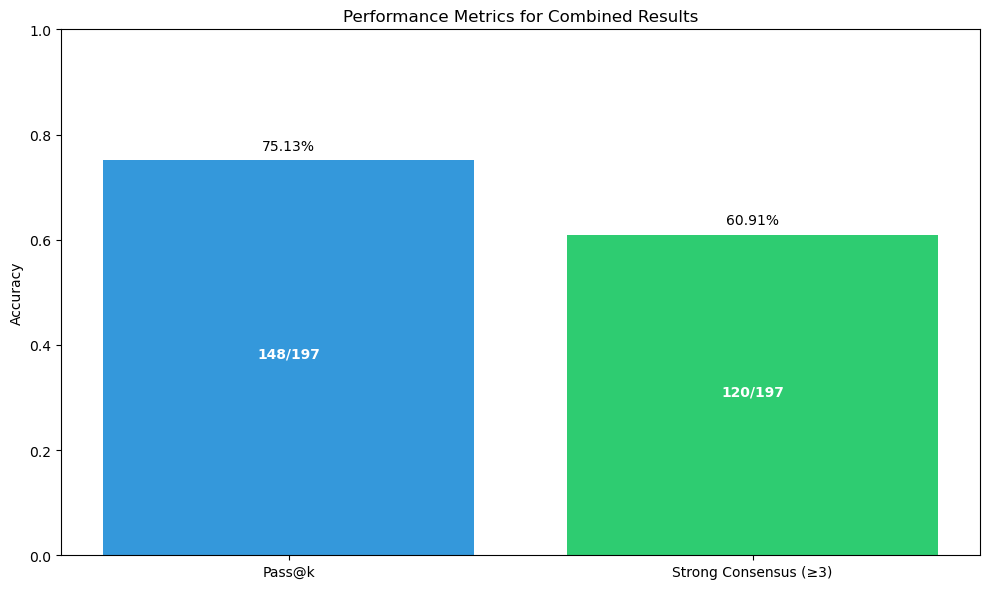

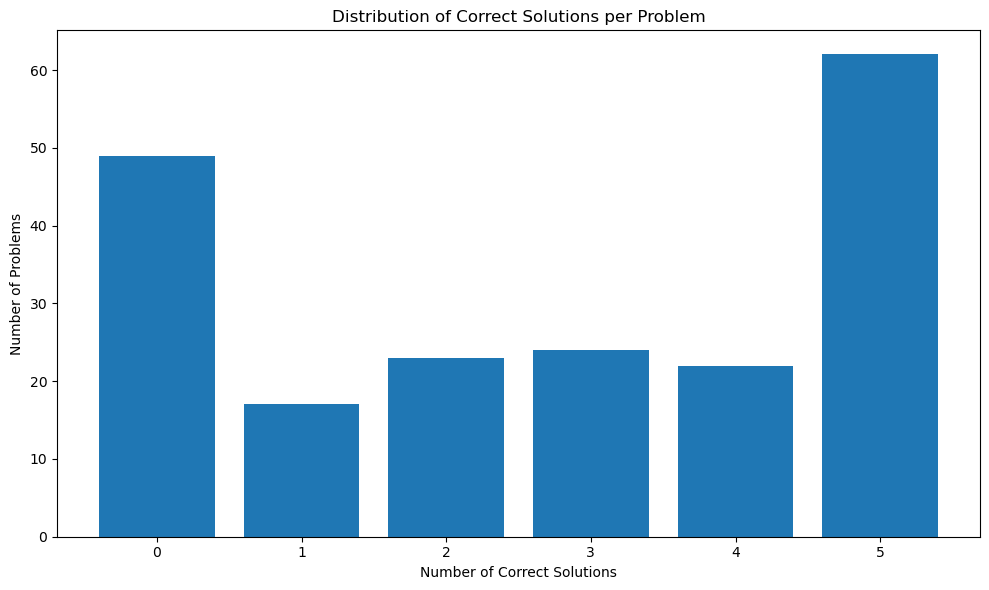

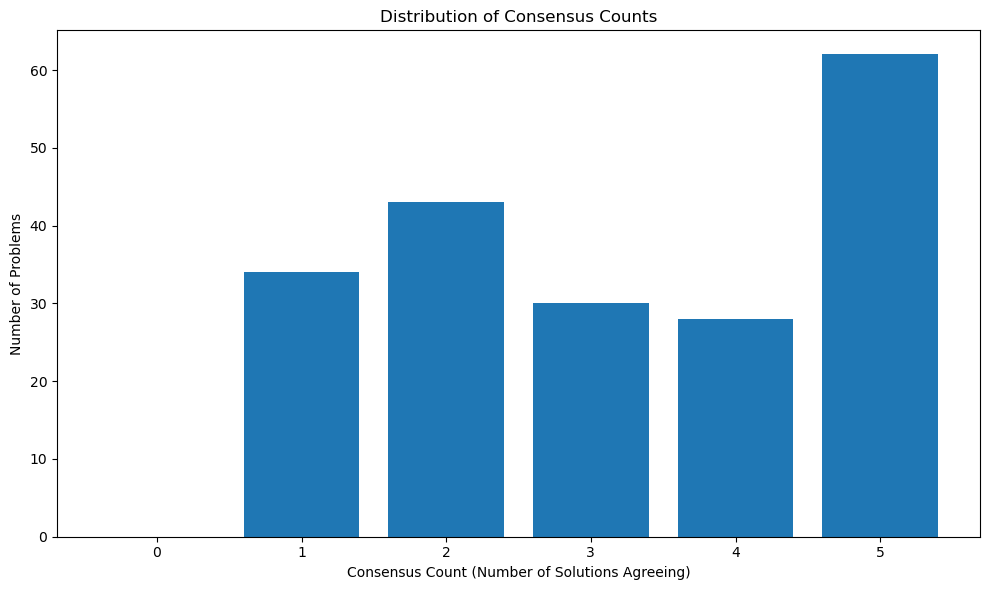

In [19]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# Load the combined results file
combined_file_path = "/sailhome/jshen3/research_projects/reasoning-distillation/results/combined_harp_results.json"  # Update this path as needed

with open(combined_file_path, 'r') as f:
    combined_data = json.load(f)

# Extract all problems
problems = combined_data.get("results", [])
total_problems = len(problems)

# Calculate pass@k accuracy (unchanged)
pass_at_k_correct = sum(1 for problem in problems if problem.get("pass_at_k", False))
pass_at_k_accuracy = pass_at_k_correct / total_problems if total_problems > 0 else 0

# Calculate consensus accuracy - new definition: consensus_count >= 3
strong_consensus_correct = sum(1 for problem in problems if problem.get("consensus_count", 0) >= 3)
strong_consensus_accuracy = strong_consensus_correct / total_problems if total_problems > 0 else 0

# Calculate total solutions
total_solutions = sum(len(problem.get("solutions", [])) for problem in problems)

# Print the metrics
print(f"Total problems: {total_problems}")
print(f"Total solutions: {total_solutions}")
print(f"Pass@k accuracy: {pass_at_k_correct}/{total_problems} = {pass_at_k_accuracy:.2%}")
print(f"Strong consensus (count ≥ 3): {strong_consensus_correct}/{total_problems} = {strong_consensus_accuracy:.2%}")

# Create a visualization of the metrics
metrics = {
    'Metric': ['Pass@k', 'Strong Consensus (≥3)'],
    'Accuracy': [pass_at_k_accuracy, strong_consensus_accuracy],
    'Count': [f"{pass_at_k_correct}/{total_problems}", f"{strong_consensus_correct}/{total_problems}"]
}

df = pd.DataFrame(metrics)

# Plot bar chart
plt.figure(figsize=(10, 6))
bar = plt.bar(df['Metric'], df['Accuracy'], color=['#3498db', '#2ecc71'])
plt.ylabel('Accuracy')
plt.title('Performance Metrics for Combined Results')
plt.ylim(0, 1.0)

# Add value labels on top of bars
for i, v in enumerate(df['Accuracy']):
    plt.text(i, v + 0.02, f"{v:.2%}", ha='center')
    plt.text(i, v/2, df['Count'][i], ha='center', color='white', fontweight='bold')

plt.tight_layout()
plt.show()

# Optional: Additional analysis - distribution of number of correct solutions per problem
correct_solutions_counts = [problem.get("num_correct", 0) for problem in problems]
max_correct = max(correct_solutions_counts) if correct_solutions_counts else 0

plt.figure(figsize=(10, 6))
plt.hist(correct_solutions_counts, bins=range(max_correct+2), align='left', rwidth=0.8)
plt.xticks(range(max_correct+1))
plt.xlabel('Number of Correct Solutions')
plt.ylabel('Number of Problems')
plt.title('Distribution of Correct Solutions per Problem')
plt.tight_layout()
plt.show()

# Additional analysis: Distribution of consensus counts
consensus_counts = [problem.get("consensus_count", 0) for problem in problems]
plt.figure(figsize=(10, 6))
plt.hist(consensus_counts, bins=range(max(consensus_counts)+2), align='left', rwidth=0.8)
plt.xticks(range(max(consensus_counts)+1))
plt.xlabel('Consensus Count (Number of Solutions Agreeing)')
plt.ylabel('Number of Problems')
plt.title('Distribution of Consensus Counts')
plt.tight_layout()
plt.show()

In [9]:
completed_pass = json.load(open("/sailhome/jshen3/research_projects/reasoning-distillation/results/harp_deepseek_qwen_14b_pass_l6/harp_deepseek_qwen_14b_pass_l6_20250506_004040/metrics.json"))
completed_pass2 = json.load(open("/sailhome/jshen3/research_projects/reasoning-distillation/results/harp_deepseek_qwen_14b_pass_l6/harp_deepseek_qwen_14b_pass_l6_20250506_175633/metrics.json"))

print(len(completed_pass['problems'].keys()))
print(len(completed_pass2['problems'].keys()))

40
50


In [7]:

completed_pass_ids = set(list(problem_ids_set) + list(problem_ids_set2) + list(problem_ids_set3))
print(len(completed_pass_ids))
print(completed_pass_ids)
print(len(completed_pass_ids))
total_ids = set(l6['id'].tolist())
retry_ids = total_ids - completed_pass_ids
print(len(retry_ids))
print(retry_ids)

65
{'H6-039', 'H6-004', 'H6-005', 'H6-091', 'H6-030', 'H6-019', 'H6-048', 'H6-096', 'H6-076', 'H6-067', 'H6-045', 'H6-026', 'H6-028', 'H6-084', 'H6-063', 'H6-068', 'H6-011', 'H6-017', 'H6-020', 'H6-021', 'H6-077', 'H6-080', 'H6-024', 'H6-092', 'H6-003', 'H6-060', 'H6-058', 'H6-066', 'H6-027', 'H6-083', 'H6-008', 'H6-002', 'H6-047', 'H6-088', 'H6-025', 'H6-009', 'H6-071', 'H6-085', 'H6-062', 'H6-064', 'H6-014', 'H6-016', 'H6-034', 'H6-010', 'H6-086', 'H6-055', 'H6-049', 'H6-037', 'H6-074', 'H6-007', 'H6-043', 'H6-032', 'H6-065', 'H6-090', 'H6-022', 'H6-036', 'H6-001', 'H6-018', 'H6-033', 'H6-057', 'H6-050', 'H6-041', 'H6-040', 'H6-029', 'H6-042'}
65
132
{'H6-133', 'H6-087', 'H6-035', 'H6-051', 'H6-131', 'H6-059', 'H6-115', 'H6-187', 'H6-097', 'H6-052', 'H6-179', 'H6-053', 'H6-169', 'H6-082', 'H6-180', 'H6-126', 'H6-105', 'H6-031', 'H6-140', 'H6-093', 'H6-070', 'H6-124', 'H6-165', 'H6-190', 'H6-116', 'H6-145', 'H6-182', 'H6-069', 'H6-128', 'H6-102', 'H6-125', 'H6-132', 'H6-152', 'H6-130'

In [17]:
l6['answer_num'] = l6['answer'].apply(lambda x: int(x[1:-1]))
l6

,id,question,solution,answer,answer_num
0,H5-001,"The numbers $1447$, $1005$ and $1231$ have som...",Suppose that the two identical digits are both...,$432$,432
1,H5-002,The solid shown has a square base of side leng...,"First, we find the height of the solid by drop...",$288$,288
2,H5-003,Diameter $AB$ of a circle has length a $2$-dig...,Let $AB=10x+y$ and $CD=10y+x$. It follows that...,$65$,65
3,H5-004,Mary told John her score on the American High ...,"Let Mary's score, number correct, and number w...",$119$,119
4,H5-005,"A gardener plants three maple trees, four oaks...",First notice that there is no difference betwe...,$106$,106
...,...,...,...,...,...
192,H5-193,Each vertex of a regular octagon is independen...,Notice that the question's condition mandates ...,$371$,371
193,H5-194,Define $f(x)=|| x|-\tfrac{1}{2}|$ and $g(x)=||...,"If we graph $4g(f(x))$, we see it forms a sawt...",$385$,385
194,H5-195,Let $\triangle ABC$ have circumcenter $O$ and ...,"By Euler's formula $OI^{2}=R(R-2r)$, we have $...",$468$,468
195,H5-196,Find the number of triples of nonnegative inte...,$ab(a+b)+bc(b+c)+ac(a+c)=300(ab+bc+ac)-3abc=60...,$601$,601


In [18]:
min_val = l6['answer_num'].min()
max_val = l6['answer_num'].max()
all_in_range = (l6['answer_num'] >= 0) & (l6['answer_num'] <= 999)
# test
print(f"Minimum value: {min_val}")
print(f"Maximum value: {max_val}")
print(f"All values between 0-999: {all_in_range.all()}")

# To see any values outside the range:
if not all_in_range.all():
    out_of_range = l6[~all_in_range]
    print(f"Values outside 0-999 range: {len(out_of_range)}")
    print(out_of_range[['answer', 'answer_num']].head())

Minimum value: 4
Maximum value: 994
All values between 0-999: True
